In [ ]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2023-07-09 15:47:25--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2023-07-09 15:47:25 (36.2 MB/s) - ‘helper.py’ saved [2813/2813]



In [ ]:
import helper
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### **Import of Training Dataset**

In [ ]:
df_train= pd.read_csv('../content/train_motion_data.csv')
df_test = pd.read_csv('../content/test_motion_data.csv')

### **Dataset Analysis**


##### **Information from Kaggle**

##### **About Dataset**: [Driving Behavior](https://www.kaggle.com/datasets/outofskills/driving-behavior)

##### **Context**
Aggressive driving behavior is the leading factor of road traffic accidents. As reported by the AAA Foundation for Traffic Safety, 106,727 fatal crashes – 55.7 percent of the total – during a recent four-year period involved drivers who committed one or more aggressive driving actions. Therefore, how to predict dangerous driving behavior quickly and accurately?

```
# Data:
Acceleration (X,Y,Z axis in meters per second squared (m/s2))
Rotation (X,Y, Z axis in degrees per second (°/s))
Classification label (SLOW, NORMAL, AGGRESSIVE)
Timestamp (time in seconds)
```

In [ ]:
df_train.shape

(3644, 8)

In [ ]:
df_test.shape

(3084, 8)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [ ]:
df_train.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631


In [ ]:
df_test.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [ ]:
df_train.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
df_test.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Class        0
Timestamp    0
dtype: int64

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [ ]:
df_train.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3644.000000,3.644000e+03
mean,0.040467,-0.073418,0.008271,0.001593,-0.001273,0.007949,3.582707e+06
std,0.985653,0.903408,0.985061,0.066918,0.126205,0.115687,6.421479e+02
min,-4.636523,-4.699795,-7.143998,-0.751822,-1.587028,-1.236468,3.581629e+06
25%,-0.550695,-0.592540,-0.558464,-0.028558,-0.053756,-0.029398,3.582121e+06
50%,0.003931,-0.080833,0.002262,0.001985,-0.001833,0.002978,3.582702e+06
75%,0.595987,0.452401,0.556157,0.031918,0.051313,0.040852,3.583270e+06
max,4.985548,4.245151,5.171739,0.849255,1.679879,1.190500,3.583791e+06


In [ ]:
df_test.describe()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Timestamp
count,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000,3084.000000
mean,0.106234,-0.131791,0.045011,0.003192,0.001452,0.011472,819830.000324
std,0.968089,0.904398,0.997625,0.066636,0.120963,0.113535,525.760733
min,-4.854163,-7.621754,-6.106982,-0.514959,-1.309466,-0.976315,818922.000000
25%,-0.408916,-0.625868,-0.461438,-0.024435,-0.045739,-0.027031,819338.000000
50%,0.051892,-0.096929,0.054154,0.001222,-0.000993,0.002291,819832.500000
75%,0.579148,0.393118,0.575119,0.028100,0.043601,0.035888,820292.250000
max,5.864980,4.308813,5.564037,1.490511,1.707598,0.719447,820709.000000


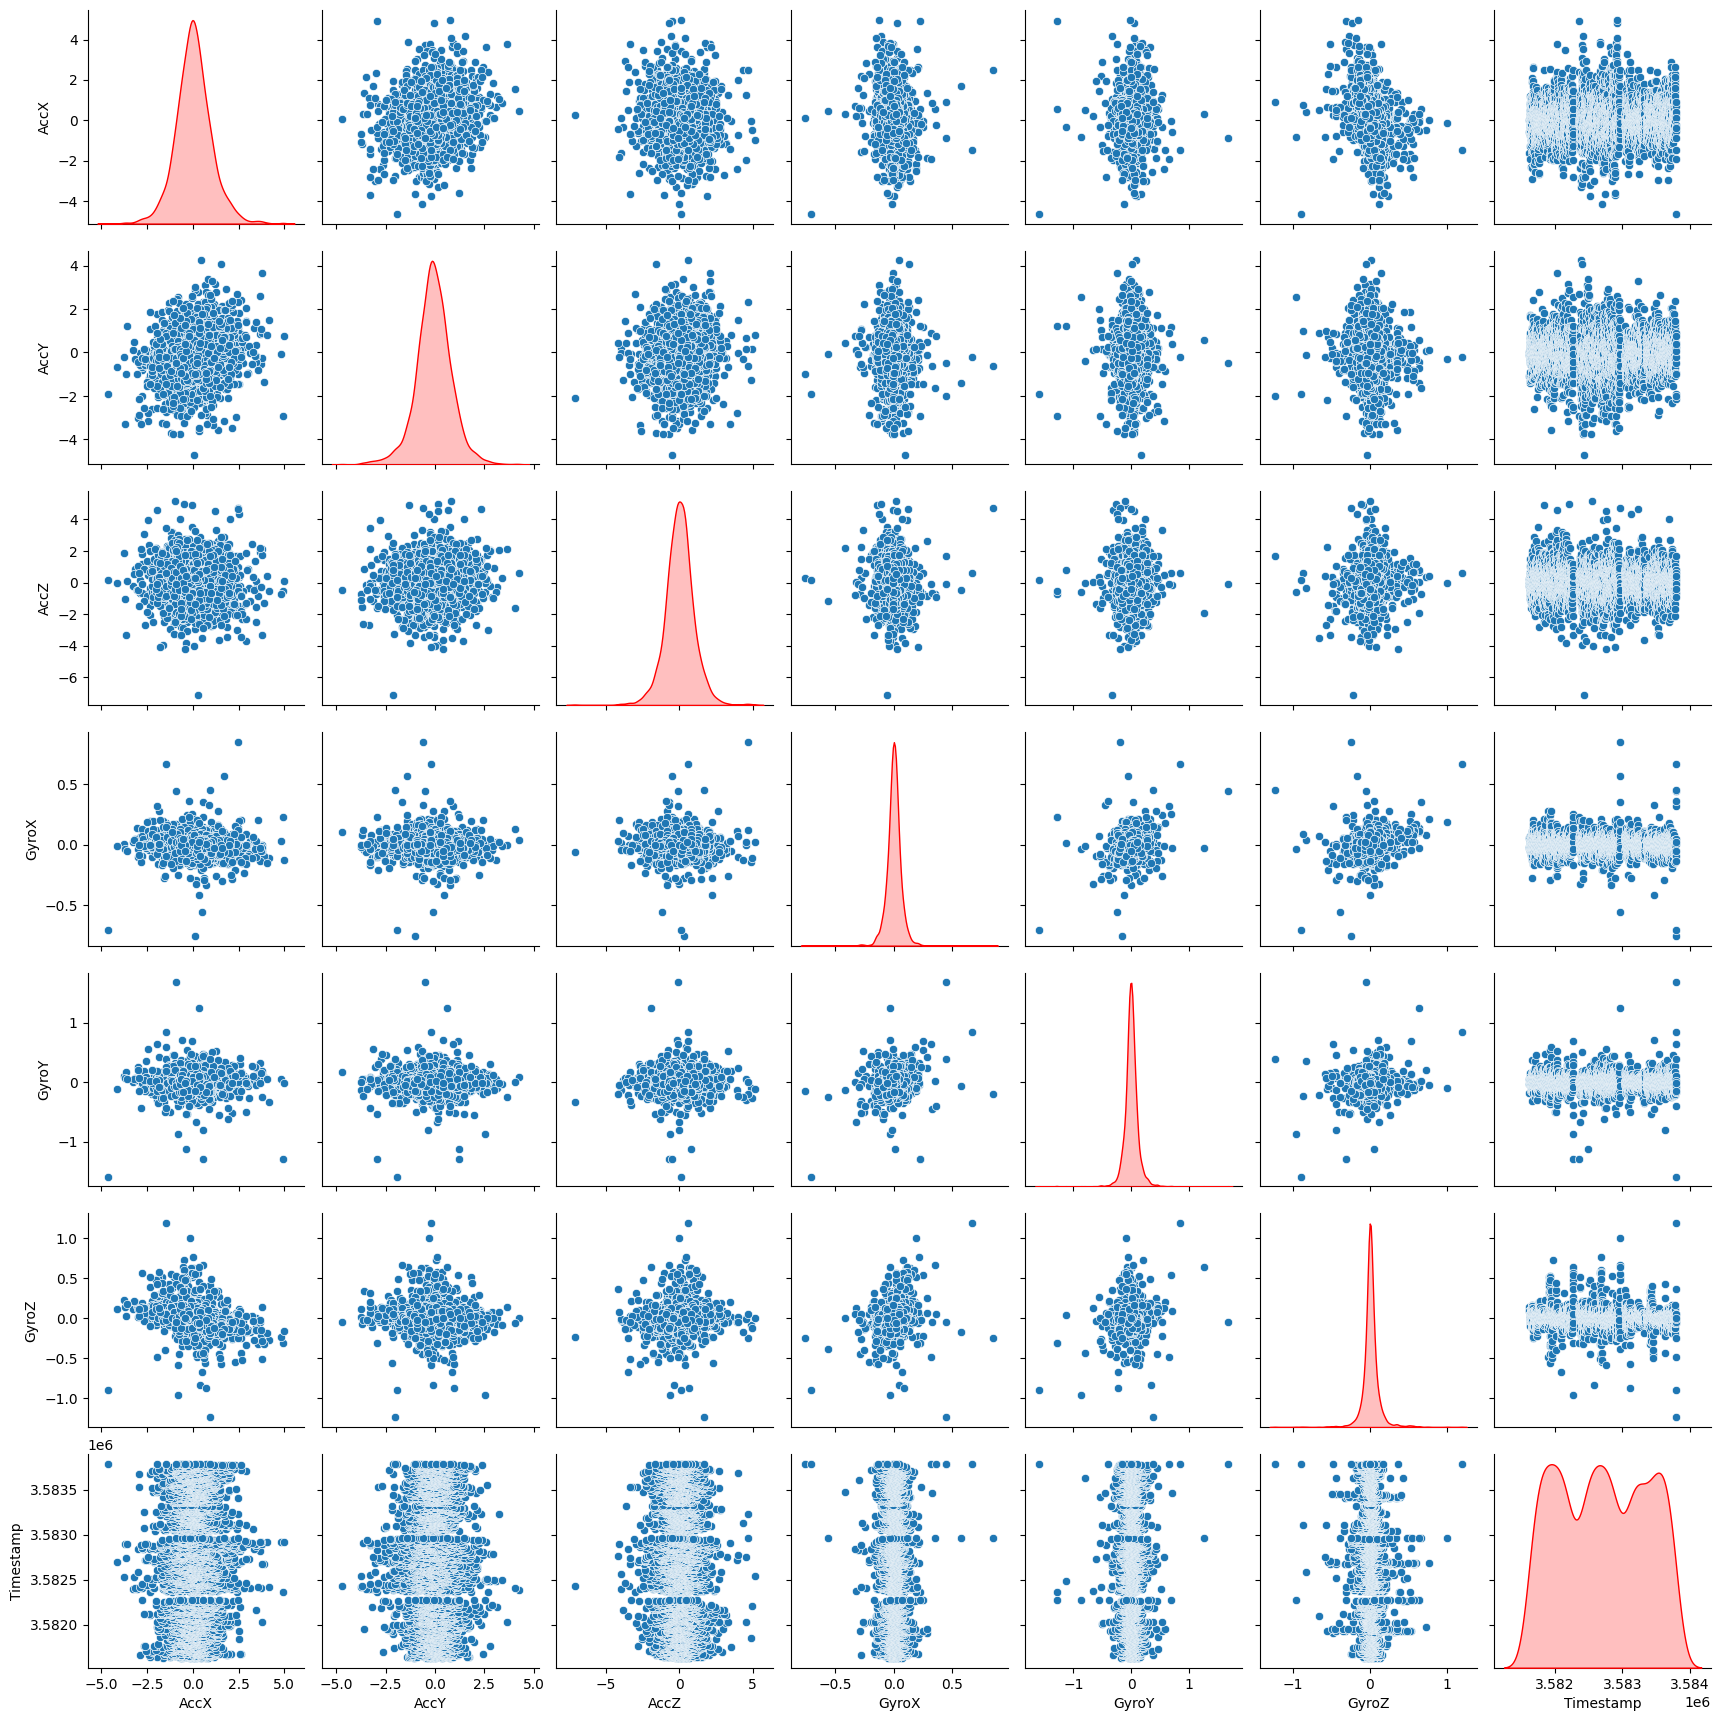

In [ ]:
sns.pairplot(df_train, diag_kind='kde', diag_kws={'color':'red'})

In [ ]:
train_data=df_train.sort_values(by='Timestamp')

In [ ]:
train_data.Timestamp.unique().shape

(1968,)

That means that there are two measurements per second

General train shape: 3644

Timestamp unique shape: 1968

In [ ]:
train_data.Timestamp.value_counts().describe()

count    1968.000000
mean        1.851626
std         0.355561
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: Timestamp, dtype: float64

In [ ]:
df_train_normal = df_train.loc[df_train['Class'] == 'NORMAL']
df_train_slow = df_train.loc[df_train['Class'] == 'SLOW']
df_train_aggressive = df_train.loc[df_train['Class'] == 'AGGRESSIVE']

df_test_normal = df_test.loc[df_test['Class'] == 'NORMAL']
df_test_slow = df_test.loc[df_test['Class'] == 'SLOW']
df_test_aggressive = df_test.loc[df_test['Class'] == 'AGGRESSIVE']

#### **Check Accelerating X, Y, Z and Driving Behavior**

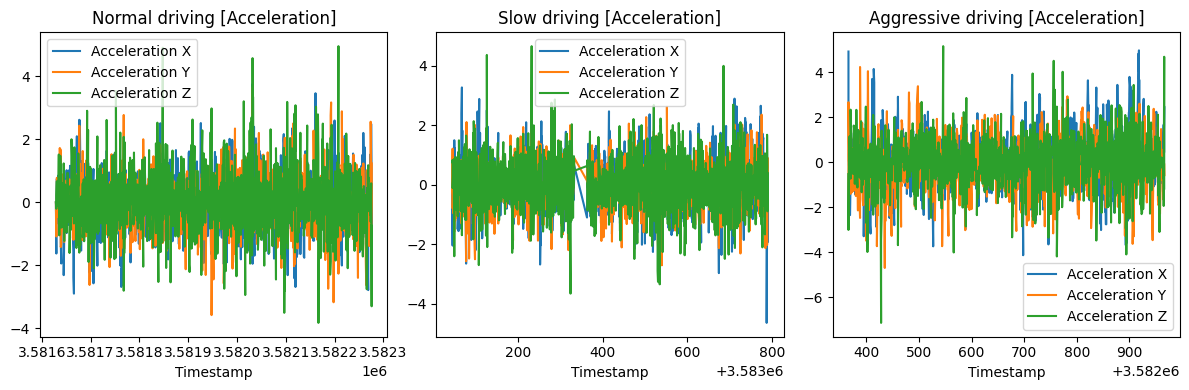

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Normal driving [Acceleration]
ax1.plot(df_train_normal['Timestamp'], df_train_normal['AccX'], label='Acceleration X')
ax1.plot(df_train_normal['Timestamp'], df_train_normal['AccY'], label='Acceleration Y')
ax1.plot(df_train_normal['Timestamp'], df_train_normal['AccZ'], label='Acceleration Z')

ax1.set_title('Normal driving [Acceleration]')
ax1.set_xlabel('Timestamp')
ax1.legend()

# Slow driving behavior's acceleration
ax2.plot(df_train_slow['Timestamp'], df_train_slow['AccX'], label='Acceleration X')
ax2.plot(df_train_slow['Timestamp'], df_train_slow['AccY'], label='Acceleration Y')
ax2.plot(df_train_slow['Timestamp'], df_train_slow['AccZ'], label='Acceleration Z')

ax2.set_title('Slow driving [Acceleration]')
ax2.set_xlabel('Timestamp')
ax2.legend()


# Aggresive driving behavior's acceleration
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccX'], label='Acceleration X')
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccY'], label='Acceleration Y')
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['AccZ'], label='Acceleration Z')

ax3.set_title('Aggressive driving [Acceleration]')
ax3.set_xlabel('Timestamp')
ax3.legend()


plt.tight_layout()
plt.show()

#### **Check Rotation X, Y, Z and Driving Behavior**

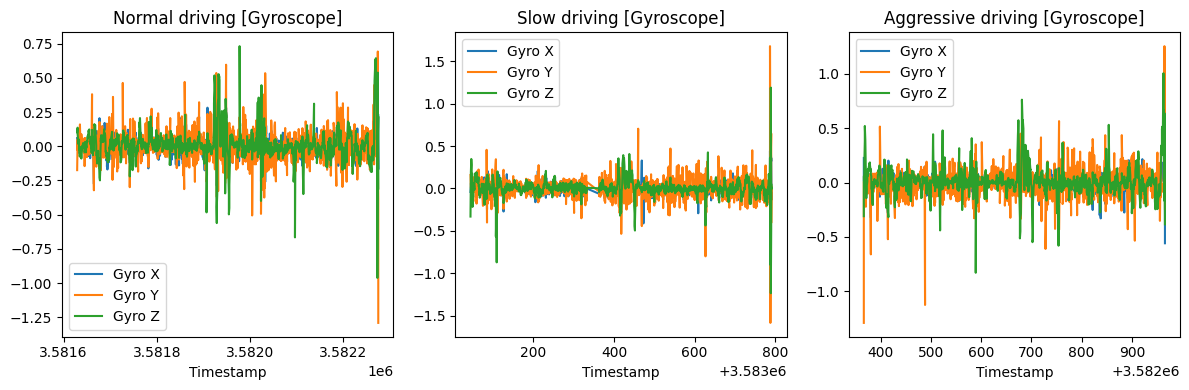

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

#Normal Driving
ax1.plot(df_train_normal['Timestamp'], df_train_normal['GyroX'], label='Gyro X')
ax1.plot(df_train_normal['Timestamp'], df_train_normal['GyroY'], label='Gyro Y')
ax1.plot(df_train_normal['Timestamp'], df_train_normal['GyroZ'], label='Gyro Z')

ax1.set_title('Normal driving [Gyroscope]')
ax1.set_xlabel('Timestamp')
ax1.legend()

#Slow Driving
ax2.plot(df_train_slow['Timestamp'], df_train_slow['GyroX'], label='Gyro X')
ax2.plot(df_train_slow['Timestamp'], df_train_slow['GyroY'], label='Gyro Y')
ax2.plot(df_train_slow['Timestamp'], df_train_slow['GyroZ'], label='Gyro Z')

ax2.set_title('Slow driving [Gyroscope]')
ax2.set_xlabel('Timestamp')
ax2.legend()

#Aggressive Driving
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroX'], label='Gyro X')
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroY'], label='Gyro Y')
ax3.plot(df_train_aggressive['Timestamp'], df_train_aggressive['GyroZ'], label='Gyro Z')

ax3.set_title('Aggressive driving [Gyroscope]')
ax3.set_xlabel('Timestamp')
ax3.legend()

plt.tight_layout()
plt.show()

As it may be noticed, there is some noice at the beggin and end of every time series
It is caused because of the class switching

In [ ]:
N_RECORDS = 11

In [ ]:
# A solution would be to just remove the first and last N samples
df_train_slow = df_train_slow.iloc[N_RECORDS:]
df_train_slow = df_train_slow.iloc[:-N_RECORDS]

df_test_slow = df_test_slow.iloc[N_RECORDS:]
df_test_slow = df_test_slow.iloc[:-N_RECORDS]

df_train_normal = df_train_normal.iloc[N_RECORDS:]
df_train_normal = df_train_normal.iloc[:-N_RECORDS]

df_test_normal = df_test_normal.iloc[N_RECORDS:]
df_test_normal = df_test_normal.iloc[:-N_RECORDS]

df_train_aggressive = df_train_aggressive.iloc[N_RECORDS:]
df_train_aggressive = df_train_aggressive.iloc[:-N_RECORDS]

df_test_aggressive = df_test_aggressive.iloc[N_RECORDS:]
df_test_aggressive = df_test_aggressive.iloc[:-N_RECORDS]

In [ ]:
# Check train data per label
train_slow_samples = df_train_slow.__len__()
train_normal_samples = df_train_normal.__len__()
train_aggressive_samples = df_train_aggressive.__len__()

print('---Train---')
print('Slow samples: ' + str(train_slow_samples))
print('Normal samples: ' + str(train_normal_samples))
print('Aggressive samples: ' + str(train_aggressive_samples))

df_train_slow = df_train_slow.tail(1300)
df_train_normal = df_train_normal.tail(1160)
df_train_aggressive = df_train_aggressive.tail(1080)

---Train---
Slow samples: 1309
Normal samples: 1178
Aggressive samples: 1091


In [ ]:
# Check test data per label
test_slow_samples = df_test_slow.__len__()
test_normal_samples = df_test_normal.__len__()
test_aggressive_samples = df_test_aggressive.__len__()

print('---Test---')
print('Slow samples: ' + str(test_slow_samples))
print('Normal samples: ' + str(test_normal_samples))
print('Aggressive samples: ' + str(test_aggressive_samples))

df_test_slow = df_test_slow.tail(1240)
df_test_normal = df_test_normal.tail(960)
df_test_aggressive = df_test_aggressive.tail(780)

---Test---
Slow samples: 1251
Normal samples: 975
Aggressive samples: 792


Separating features from labels

In [ ]:
FEATURES = 6

In [ ]:
# Features
X_train_normal = df_train_normal.iloc[: , :FEATURES]
X_train_slow = df_train_slow.iloc[: , :FEATURES]
X_train_aggressive = df_train_aggressive.iloc[: , :FEATURES]

X_test_normal = df_test_normal.iloc[: , :FEATURES]
X_test_slow = df_test_slow.iloc[: , :FEATURES]
X_test_aggressive = df_test_aggressive.iloc[: , :FEATURES]

# Labels
y_train_normal = df_train_normal.Class
y_train_slow = df_train_slow.Class
y_train_aggressive = df_train_aggressive.Class

y_test_normal = df_test_normal.Class
y_test_slow = df_test_slow.Class
y_test_aggressive = df_test_aggressive.Class

### **Define Train and Test dataset to use Pytorch**

Combine all the samples intro a train dataset

In [ ]:
X_train = pd.concat([X_train_normal, X_train_aggressive])
y_train = pd.concat([y_train_normal, y_train_aggressive])

X_test = pd.concat([X_test_normal, X_test_aggressive])
y_test = pd.concat([y_test_normal, y_test_aggressive])

### **Define Model**

In [ ]:
# Define tu conjunto de datos personalizado
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [ ]:
labelEncoder = LabelEncoder()
y_train_encode = labelEncoder.fit_transform(y_train)
y_test_encode = labelEncoder.transform(y_test)

In [ ]:
# Convierte las etiquetas a tensores de PyTorch
num_classes = len(labelEncoder.classes_)
y_train_tensor = torch.tensor(y_train_encode)
y_test_tensor = torch.tensor(y_test_encode)

In [ ]:
# Estandariza los datos
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

In [ ]:
# Convierte los datos a tensores de PyTorch
X_train_tensor = torch.tensor(X_train_stand, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_stand, dtype=torch.float32)

In [ ]:
# Define el modelo de red neuronal LSTM en PyTorch
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
X_train_tensor.shape

torch.Size([2240, 6])

In [ ]:
# Configuración de parámetros
input_size = X_train.shape[1]
hidden_size = 64
batch_size = 32
learning_rate = 0.001
num_epochs = 10
num_frames = 1

# Cálculo de la longitud de secuencia
sequence_length_train = X_train_tensor.shape[0] // num_frames
sequence_length_test = X_test_tensor.shape[0] // num_frames

In [ ]:
# tamaño de los datos de entrenamiento y prueba sea compatible con la longitud de secuencia
X_train_tensor_re = X_train_tensor[:sequence_length_train * num_frames]
X_test_tensor_re = X_test_tensor[:sequence_length_test * num_frames]

# Reshape de los datos de entrenamiento y prueba
X_train_re = X_train_tensor_re.reshape(sequence_length_train, num_frames, input_size)
X_test_re = X_test_tensor_re.reshape(sequence_length_test, num_frames, input_size)

In [ ]:
X_test_re.shape

torch.Size([1740, 1, 6])

In [ ]:
X_train_re.shape

torch.Size([2240, 1, 6])

In [ ]:
train_dataset = MyDataset(X_train_re, y_train_tensor)
test_dataset = MyDataset(X_test_re, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Creación del modelo
model = LSTMModel(input_size, hidden_size, num_classes)

# Define la función de pérdida y el optimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_loss_history = []
val_loss_history = []
train_sizes = []

# Entrenamiento del modelo
for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Guardar la pérdida de entrenamiento
        train_loss_history.append(loss.item())

    # Validación del modelo
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        y_true = []
        y_pred = []
        val_loss = 0
        total_val_samples = 0
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels) * inputs.size(0)
            total_val_samples += inputs.size(0)

            # Guardar las etiquetas reales y las predicciones para calcular la matriz de confusión
            y_true.extend(labels.tolist())
            y_pred.extend(predicted.tolist())

        val_loss /= total_val_samples

        # Guardar la pérdida de validación
        val_loss_history.append(val_loss.item())

        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}")

      # Registrar el tamaño del conjunto de entrenamiento actual
    train_sizes.append(len(train_loader.dataset))

    # Imprimir los resultados del epoch actual
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss_history[-1]:.4f}, Val Loss: {val_loss_history[-1]:.4f} ")
    print("")

Epoch [1/10], Accuracy: 0.6006
Epoch [1/10], Train Loss: 0.6305, Val Loss: 0.6706 

Epoch [2/10], Accuracy: 0.6017
Epoch [2/10], Train Loss: 0.5750, Val Loss: 0.6710 

Epoch [3/10], Accuracy: 0.6011
Epoch [3/10], Train Loss: 0.6852, Val Loss: 0.6709 

Epoch [4/10], Accuracy: 0.6006
Epoch [4/10], Train Loss: 0.6121, Val Loss: 0.6726 

Epoch [5/10], Accuracy: 0.6017
Epoch [5/10], Train Loss: 0.6091, Val Loss: 0.6731 

Epoch [6/10], Accuracy: 0.6023
Epoch [6/10], Train Loss: 0.6149, Val Loss: 0.6723 

Epoch [7/10], Accuracy: 0.6006
Epoch [7/10], Train Loss: 0.6793, Val Loss: 0.6724 

Epoch [8/10], Accuracy: 0.6052
Epoch [8/10], Train Loss: 0.6363, Val Loss: 0.6765 

Epoch [9/10], Accuracy: 0.6034
Epoch [9/10], Train Loss: 0.5630, Val Loss: 0.6725 

Epoch [10/10], Accuracy: 0.6006
Epoch [10/10], Train Loss: 0.6285, Val Loss: 0.6718 



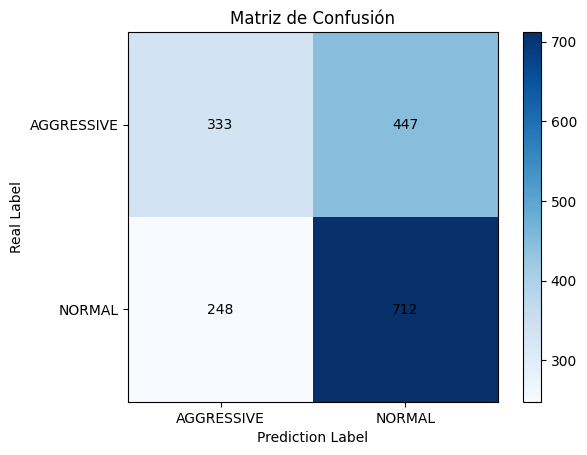

In [ ]:
from sklearn.metrics import confusion_matrix
# Calcular y visualizar la matriz de confusión
confusion = confusion_matrix(y_true, y_pred)
classes = labelEncoder.classes_
fig, ax = plt.subplots()
im = ax.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(confusion.shape[1]),
       yticks=np.arange(confusion.shape[0]),
       xticklabels=classes, yticklabels=classes,
       xlabel='Prediction Label', ylabel='Real Label',
       title='Matriz de Confusión')

# Agregar los números dentro de los cuadros de la matriz de confusión
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax.text(j, i, str(confusion[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
X_test_re.shape

torch.Size([1740, 1, 6])